In [36]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torch import nn
from torch.utils.data import DataLoader

In [37]:
weight = torchvision.models.ResNet152_Weights.IMAGENET1K_V2
model = torchvision.models.resnet152(weight)
model.fc = nn.Sequential(
    nn.Linear(2048,2048),
    nn.Dropout(),
    nn.Linear(2048,5)
)
print(model.fc)
# print(model)
test_preprocess = weight.transforms()
train_preprocess = torchvision.transforms.Compose([
    torchvision.transforms.RandomRotation(90),
    test_preprocess
])

Sequential(
  (0): Linear(in_features=2048, out_features=2048, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): Linear(in_features=2048, out_features=5, bias=True)
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3306 364


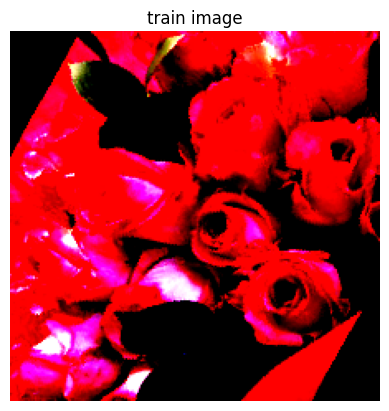

In [45]:
traindataset = torchvision.datasets.ImageFolder('../data_set/flower_data/train/',transform=train_preprocess)
testdataset = torchvision.datasets.ImageFolder('../data_set/flower_data/val/',transform=test_preprocess)
print(len(traindataset),len(testdataset))
traindataloader = DataLoader(traindataset,batch_size=8,shuffle=True)
testdataloader = DataLoader(testdataset,batch_size=8)
plt.imshow(next(iter(traindataloader))[0][0].squeeze().permute(1,2,0))
plt.axis('off')
plt.title("train image")
plt.show()

In [44]:
optimizer = torch.optim.AdamW(model.parameters(),lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 10
import sys
sys.path.append('..')
from device_agnosticCode import detect_device
device = detect_device()
model.to(device)
model.train()
for epoch in range(epochs):
    for features,labels in traindataloader:
        features,labels = features.to(device),labels.to(device)
        pred = model(features)
        break

Cuda torch working: True
GPU device count: 1
GPU name: NVIDIA GeForce RTX 3060
current device no.: 0


OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 0; 11.76 GiB total capacity; 10.17 GiB already allocated; 3.44 MiB free; 10.49 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF